# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [9]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'data/vehicles.csv'
used_cars = pd.read_csv(file_path)

# Display basic information and sample records
print("Dataset Info:")
used_cars.info()
print("\nSample Data:")
print(used_cars.head())

# Check for missing values
missing_values = used_cars.isnull().sum()
print("\nMissing Values:")
print(missing_values)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  obj

In [ ]:
# Given the shape of the dataset, use price as the dependent variable and predict car prices using regression techniques. Identify which features
# significantly impact car prices. The independent variables you will use will include year, manufacturer, condition, cylinders, fuel and odometer.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
# In order to get a better understanding of the data, we'll first explore the dataset using the info and head functions. 
# We'll then search for missing values using is_null()
# We can also check for duplicates using the duplicated() function
# We can then look for data consistency issues using the unique() function
# The next step would be to look for any outliers in the data
# Once the data is fairly clean we can look at feature distributions
# Then we'll look for relationships between different variables and look for patterns
# And lastly, we'll look at feature relevancy

In [2]:
print(used_cars.info())
print(used_cars.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
print(used_cars.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [4]:
missing_values = used_cars.isnull().sum()
print(missing_values)
print((missing_values / len(used_cars)) * 100)  # Percentage of missing data

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [5]:
duplicates = used_cars.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
used_cars = used_cars.drop_duplicates()

Number of duplicates: 0


In [6]:
for col in ['manufacturer', 'fuel', 'condition']:
    print(f"Unique values in {col}: {used_cars[col].unique()}")

Unique values in manufacturer: [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
Unique values in fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
Unique values in condition: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


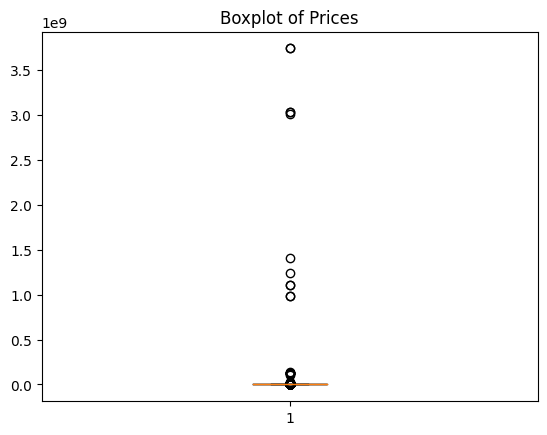

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(used_cars['price'])
plt.title('Boxplot of Prices')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [8]:
used_cars['manufacturer'].fillna('unknown', inplace=True)
used_cars['condition'].fillna('unknown', inplace=True)

used_cars['odometer'].fillna(used_cars['odometer'].median(), inplace=True)

used_cars = used_cars[(used_cars['price'] > 500) & (used_cars['price'] < 100000)]

used_cars = used_cars[(used_cars['odometer'] > 0) & (used_cars['odometer'] < 1_000_000)]

In [10]:
used_cars['car_age'] = 2024 - used_cars['year']

used_cars['log_price'] = np.log1p(used_cars['price'])

used_cars['mileage_per_year'] = used_cars['odometer'] / used_cars['car_age'].replace(0, 1)

In [11]:
used_cars = pd.get_dummies(used_cars, columns=['fuel', 'condition', 'transmission'], drop_first=True)
from sklearn.preprocessing import LabelEncoder
used_cars['manufacturer_encoded'] = LabelEncoder().fit_transform(used_cars['manufacturer'])

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['odometer', 'car_age', 'mileage_per_year']
used_cars[numerical_cols] = scaler.fit_transform(used_cars[numerical_cols])

In [13]:
used_cars.drop(['VIN', 'state', 'year'], axis=1, inplace=True)

In [14]:
X = used_cars.drop(['price', 'log_price'], axis=1)
y = used_cars['log_price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [20]:
categorical_cols = [
    'region', 'manufacturer', 'model', 'cylinders', 'title_status',
    'drive', 'size', 'type', 'paint_color', 'transmission_manual',
    'transmission_other'
]
numerical_cols = ['odometer', 'car_age', 'mileage_per_year']

# Ensure 'price' is your target column
target_col = 'price'

# Verify that all columns exist
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['region', 'manufacturer', 'model', 'cylinders', 'title_status', 'drive', 'size', 'type', 'paint_color', 'transmission_manual', 'transmission_other']
Numerical Columns: ['odometer', 'car_age', 'mileage_per_year']


In [21]:
print(y_train.head())  # Ensure 'price' is present and correctly separated

366318    10.757818
56271      0.000000
264620    10.515994
88787      7.244228
341412    10.295226
Name: log_price, dtype: float64


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [24]:
print(X_train.columns)
print(y_train.head())

Index(['id', 'region', 'manufacturer', 'model', 'cylinders', 'odometer',
       'title_status', 'drive', 'size', 'type', 'paint_color', 'car_age',
       'mileage_per_year', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'fuel_other', 'condition_fair', 'condition_good', 'condition_like new',
       'condition_new', 'condition_salvage', 'transmission_manual',
       'transmission_other', 'manufacturer_encoded'],
      dtype='object')
366318    10.757818
56271      0.000000
264620    10.515994
88787      7.244228
341412    10.295226
Name: log_price, dtype: float64


In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(341504, 25) (341504,)
(85376, 25) (85376,)


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Example: Linear Regression
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
preds = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, preds)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 5.9019


In [39]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Impute only numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
X_train_numeric = pd.DataFrame(
    knn_imputer.fit_transform(X_train[numeric_cols]),
    columns=numeric_cols,
    index=X_train.index
)
X_test_numeric = pd.DataFrame(
    knn_imputer.transform(X_test[numeric_cols]),
    columns=numeric_cols,
    index=X_test.index
)

# Handle categorical columns (One-Hot Encoding as an example)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_categorical = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)
X_test_categorical = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)

# Combine numeric and categorical data
X_train_prepared = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_prepared = pd.concat([X_test_numeric, X_test_categorical], axis=1)

In [41]:
print("Shape of X_train_prepared:", X_train_prepared.shape)
print("Shape of X_test_prepared:", X_test_prepared.shape)

Shape of X_train_prepared: (74360, 9169)
Shape of X_test_prepared: (18422, 9169)


In [42]:
print("Sample of Prepared Training Data:")
print(X_train_prepared.head())

Sample of Prepared Training Data:
                  id  odometer   car_age  mileage_per_year  \
264620  7.310280e+09 -0.115248 -0.504100          0.053289   
153889  7.303580e+09  0.351708  0.342272          0.132815   
201697  7.310888e+09  0.126036  0.024882          0.074488   
336519  7.313485e+09  0.205519  0.342272          0.038909   
151550  7.315252e+09 -0.023580  0.130679         -0.068353   

        manufacturer_encoded  region_SF bay area  region_abilene  \
264620                  13.0                 0.0             0.0   
153889                  13.0                 0.0             0.0   
201697                   4.0                 0.0             0.0   
336519                  13.0                 0.0             0.0   
151550                  41.0                 0.0             0.0   

        region_akron / canton  region_albany  region_albuquerque  ...  \
264620                    0.0            1.0                 0.0  ...   
153889                    0.0         

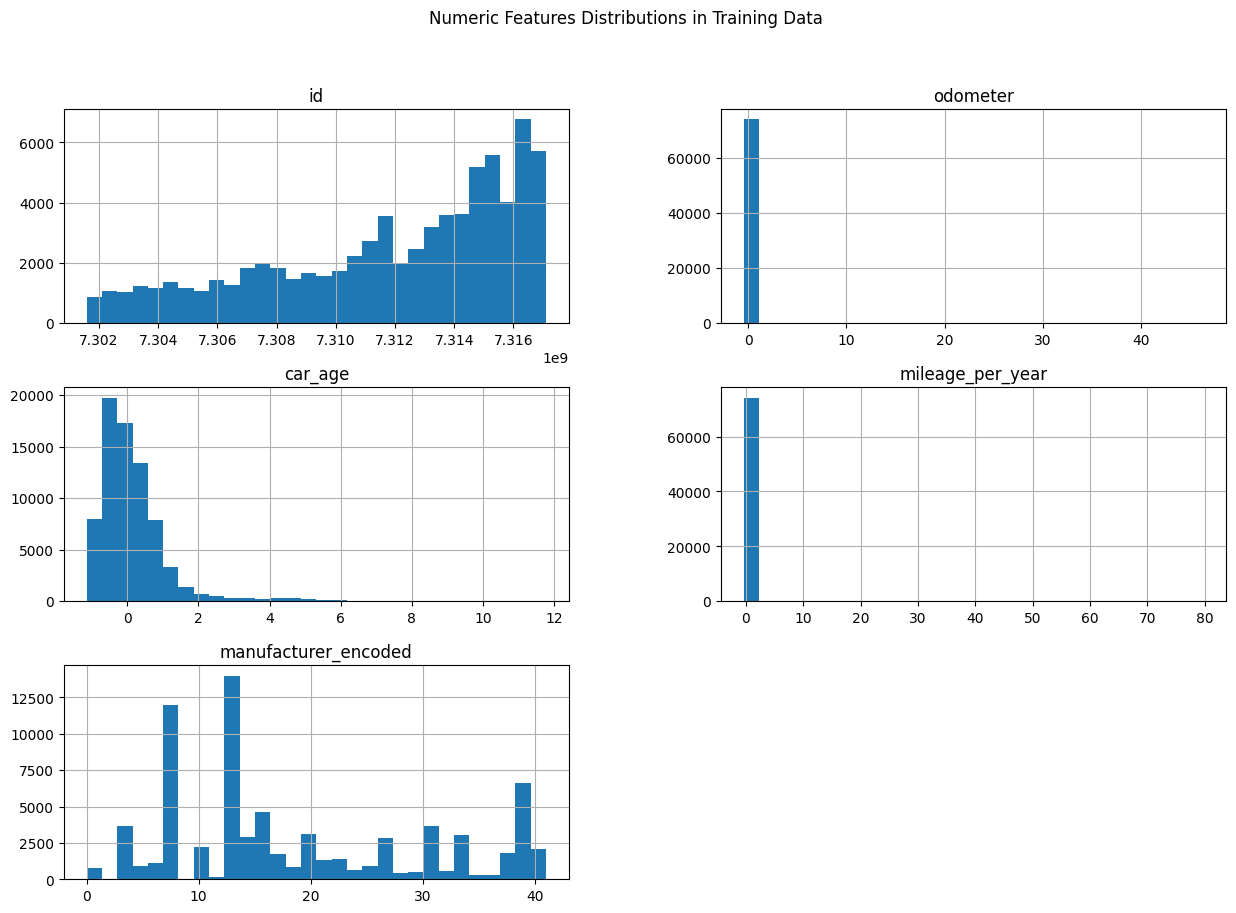

In [43]:
import matplotlib.pyplot as plt

# Visualize distributions of numeric features
X_train_numeric.hist(bins=30, figsize=(15, 10))
plt.suptitle("Numeric Features Distributions in Training Data")
plt.show()

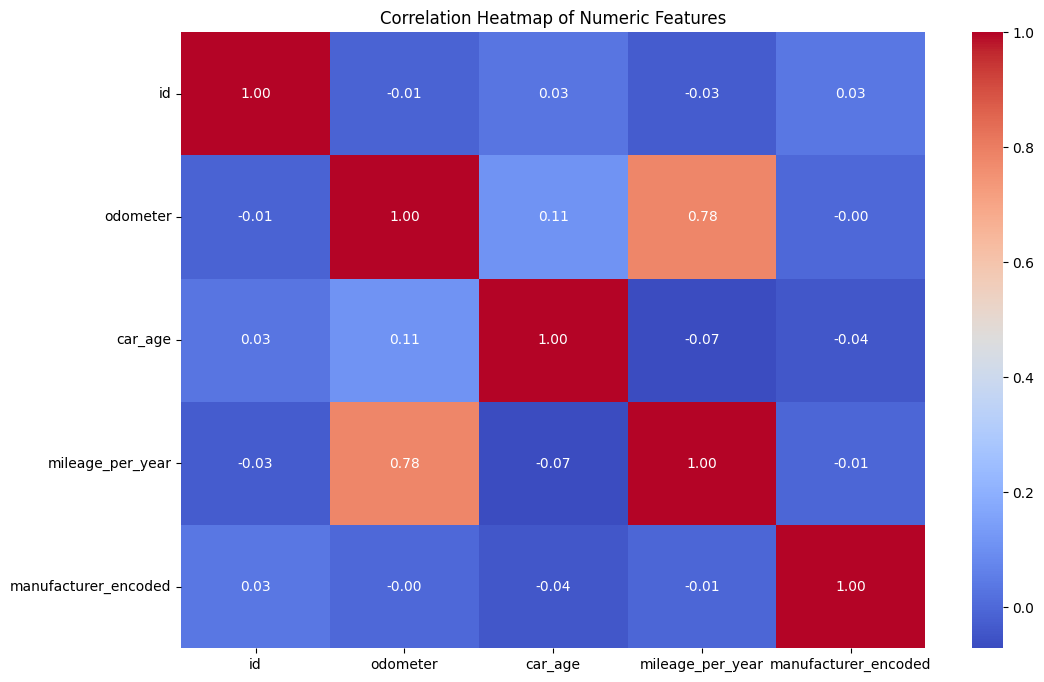

In [44]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(X_train_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

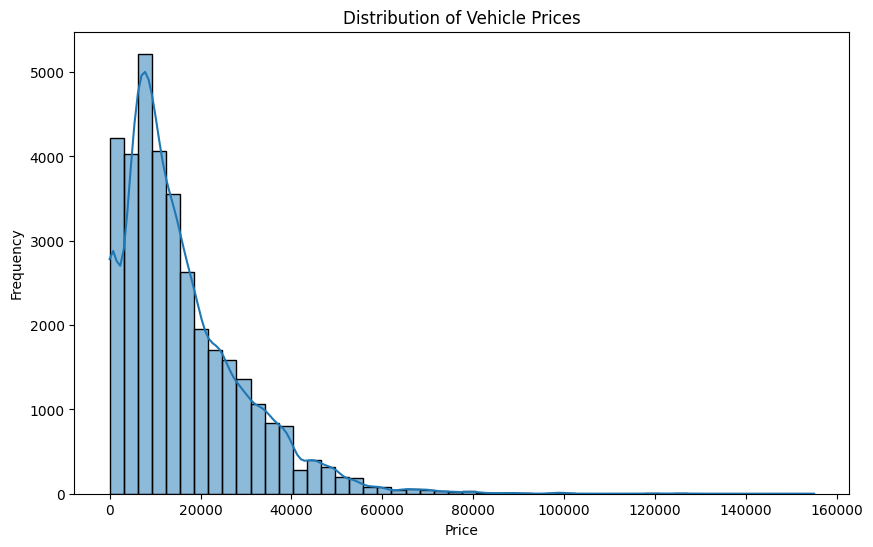

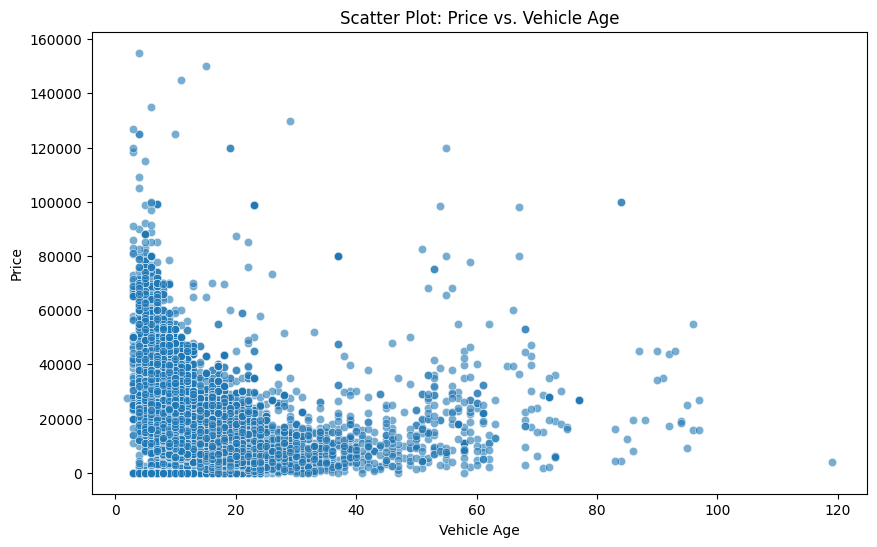

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv("data/vehicles.csv")

# Dropping all rows with any missing values
data = data.dropna()

# Feature Engineering: Create a new column for the age of the vehicle
data["vehicle_age"] = 2024 - data["year"]

# Drop the original 'year' column since it's now redundant
data = data.drop(columns=["year"])

# Plotting the distribution of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(data["price"], bins=50, kde=True)
plt.title("Distribution of Vehicle Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Scatter plot for price vs. vehicle age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="vehicle_age", y="price", alpha=0.6)
plt.title("Scatter Plot: Price vs. Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Price")
plt.show()

# Split data into features and target variable
X = data.drop(columns=["price", "id", "VIN", "region", "state"])  # Remove irrelevant columns
y = data["price"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for numerical and categorical features
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define the model pipeline with RandomForestRegressor
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Cross-validation scores for the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="neg_mean_absolute_error")
print("Cross-Validation MAE Scores:", -cv_scores)
print("Mean CV MAE:", -cv_scores.mean())

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Vehicle Age: This is a primary determinant of price. Newer cars typically have higher prices due to lower wear and tear and modern features.
# Market Saturation: The clustering of prices below $20,000 suggests a dominant market for affordable used cars.
# Outliers in Older Cars: Some older vehicles may have collector’s value or other unique attributes maintaining higher prices.

In [ ]:
# Based on the data our recommendation to the dealers would be to pay less for used car trade-ins as there appears to be significant market saturation.
# They should also consider denying older trade-ins as they will find it difficult to sell.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.